## Table of Contents
- [Introduction](#Introduction)
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Feature Engineering](#Feature-Engineering)
- [Model Building and Evaluation](#Model-Building-and-Evaluation)
- [Conclusion and Future Work](#Conclusion-and-Future-Work)

## Introduction

In this notebook, we will analyze a dataset related to engine failures. The dataset contains various features such as temperature, RPM, fuel efficiency, vibration levels, torque, power output, fault condition, and operational mode. Our goal is to explore the data, perform feature engineering, and build a predictive model to detect engine failures.

## Data Loading


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('engine_failure_dataset.csv', parse_dates=['Time_Stamp'])

# Set the timestamp as the index
df.set_index('Time_Stamp', inplace=True)

# Display the first few rows of the dataset
df.head()

,Temperature (°C),RPM,Fuel_Efficiency,Vibration_X,Vibration_Y,Vibration_Z,Torque,Power_Output (kW),Fault_Condition,Operational_Mode
Time_Stamp,,,,,,,,,,
2024-12-24 10:00:00,60.308585,3426.827588,20.445472,0.874657,0.005686,0.529798,107.877659,23.367684,2,Idle
2024-12-24 10:05:00,112.705055,2949.758424,23.083947,0.696461,0.391779,0.124336,60.351655,57.941022,3,Cruising
2024-12-24 10:10:00,108.670976,1817.971040,20.555326,0.495276,0.189714,0.886417,110.986564,47.732998,2,Cruising
2024-12-24 10:15:00,107.114691,2730.660539,23.226431,0.986206,0.983202,0.468114,77.416793,44.112039,2,Cruising
2024-12-24 10:20:00,118.075814,1854.488677,21.148226,0.710810,0.101139,0.481034,100.475881,80.681972,2,Cruising


In [6]:
df.Fault_Condition.value_counts().apply(lambda x: f"{x} ({x / len(df) * 100:.2f}%)")

Fault_Condition
2    265 (26.50%)
0    258 (25.80%)
1    248 (24.80%)
3    229 (22.90%)
Name: count, dtype: object

## Data Cleaning and Preprocessing

Before diving into analysis, it's essential to clean and preprocess the data. This includes handling missing values, correcting data types, and renaming columns for easier access.

In [8]:
# change the operational mode column to integer values 
mode_map = {
    'Idle': 1,
    'Cruising': 2,
    'Heavy Load': 3
}

df['Operational_Mode'] = df['Operational_Mode'].map(mode_map)

In [9]:
df.dtypes

Temperature (°C)     float64
RPM                  float64
Fuel_Efficiency      float64
Vibration_X          float64
Vibration_Y          float64
Vibration_Z          float64
Torque               float64
Power_Output (kW)    float64
Fault_Condition        int64
Operational_Mode       int64
dtype: object

## Exploratory Data Analysis

Let's explore the data to understand the distribution of features and their relationships. We will use various visualization techniques to gain insights.

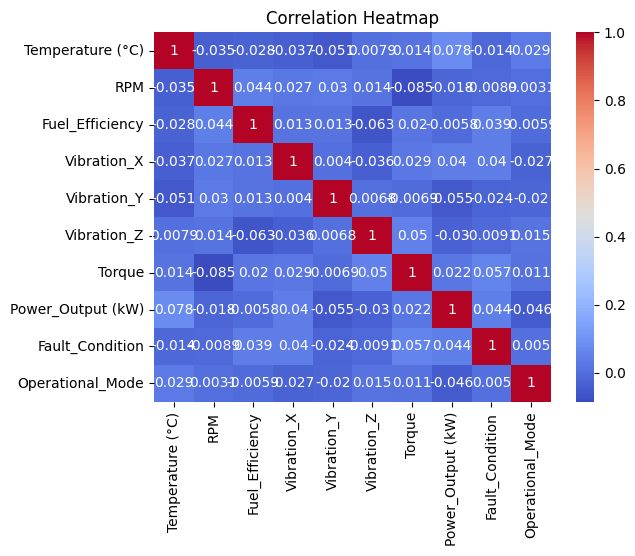

In [13]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

Feature engineering involves creating new features or modifying existing ones to improve model performance. Let's see if we can create any new features from the existing data.

In [29]:
# Convert Fault_Condition to binary labels
df['Risk_Flag'] = df['Fault_Condition'].apply(lambda x: 1 if x in [1, 2, 3] else 0)
df

,Temperature (°C),RPM,Fuel_Efficiency,Vibration_X,Vibration_Y,Vibration_Z,Torque,Power_Output (kW),Fault_Condition,Operational_Mode,Risk_Flag
Time_Stamp,,,,,,,,,,,
2024-12-24 10:00:00,60.308585,3426.827588,20.445472,0.874657,0.005686,0.529798,107.877659,23.367684,2,1,1
2024-12-24 10:05:00,112.705055,2949.758424,23.083947,0.696461,0.391779,0.124336,60.351655,57.941022,3,2,1
2024-12-24 10:10:00,108.670976,1817.971040,20.555326,0.495276,0.189714,0.886417,110.986564,47.732998,2,2,1
2024-12-24 10:15:00,107.114691,2730.660539,23.226431,0.986206,0.983202,0.468114,77.416793,44.112039,2,2,1
2024-12-24 10:20:00,118.075814,1854.488677,21.148226,0.710810,0.101139,0.481034,100.475881,80.681972,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27 20:55:00,88.231211,1477.774501,23.749532,0.827987,0.664745,0.625331,178.466184,41.494154,3,2,1
2024-12-27 21:00:00,105.241946,1617.745044,16.166110,0.753548,0.797969,0.618335,154.586204,52.987240,0,2,0
2024-12-27 21:05:00,119.066775,2473.669785,17.657404,0.982960,0.699409,0.804165,164.138685,55.994142,3,1,1


In [30]:
from sklearn.preprocessing import StandardScaler
# Drop 'Fault_Condition' (target) 
# 'Operational_Mode' is already converted to numeric
df_features = df.drop(columns=['Fault_Condition', 'Risk_Flag'])

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), index=df_features.index, columns=df_features.columns)
df_scaled

,Temperature (°C),RPM,Fuel_Efficiency,Vibration_X,Vibration_Y,Vibration_Z,Torque,Power_Output (kW),Operational_Mode
Time_Stamp,,,,,,,,,
2024-12-24 10:00:00,-1.750838,1.054660,-0.462546,1.270065,-1.767866,0.161848,-0.366098,-1.576714,-1.182082
2024-12-24 10:05:00,1.287264,0.504477,0.134298,0.664744,-0.393409,-1.244519,-1.474558,-0.041760,0.054405
2024-12-24 10:10:00,1.053356,-0.800765,-0.437697,-0.018666,-1.112743,1.398800,-0.293588,-0.494966,0.054405
2024-12-24 10:15:00,0.963118,0.251801,0.166529,1.648988,1.712006,-0.052107,-1.076543,-0.655726,0.054405
2024-12-24 10:20:00,1.598676,-0.758650,-0.303578,0.713487,-1.428062,-0.007294,-0.538731,0.967871,0.054405
...,...,...,...,...,...,...,...,...,...
2024-12-27 20:55:00,-0.131802,-1.193098,0.284858,1.111531,0.578327,0.493207,1.280255,-0.771952,0.054405
2024-12-27 21:00:00,0.854531,-1.031677,-1.430572,0.858665,1.052594,0.468942,0.723297,-0.261693,0.054405
2024-12-27 21:05:00,1.656135,-0.044576,-1.093230,1.637961,0.701729,1.113504,0.946092,-0.128196,-1.182082


## Model Building and Evaluation

We will build a predictive model to detect engine failures using a neural network. Let's split the data into training and testing sets, train the model, and evaluate its performance.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import joblib

# Preprocessing
X = df_scaled
y = df['Risk_Flag']   # Target: 0, 1, 2, 3

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7157 - loss: 0.6243 - val_accuracy: 0.7125 - val_loss: 0.6048
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.5967 - val_accuracy: 0.7125 - val_loss: 0.5998
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7352 - loss: 0.5808 - val_accuracy: 0.7125 - val_loss: 0.5976
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7199 - loss: 0.5823 - val_accuracy: 0.7125 - val_loss: 0.6004
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7397 - loss: 0.5696 - val_accuracy: 0.7125 - val_loss: 0.6003
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7162 - loss: 0.5784 - val_accuracy: 0.7125 - val_loss: 0.6009
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7048 - loss: 0.5877 - val_accuracy: 0.7125 - val_loss: 0.6001
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7144 - loss: 0.5785 - val_accuracy: 0.7125 - v

In [39]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8452 - loss: 0.4798 
Test Accuracy: 0.8400
